In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image (1).zip to image (1).zip


In [ ]:
import zipfile
import os

# Correct simple path
zip_path = '/content/image (1).zip'      # because it's in same folder as the notebook
extract_path = '/content/'      # we will extract into "images" folder

# Unzipping
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Images extracted successfully!")

Images extracted successfully!


In [ ]:
images_fp = '/content/images'
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(images_fp,'*.jpg'))]
image_names

['american_pit_bull_terrier_28.jpg',
 'english_cocker_spaniel_168.jpg',
 'pug_85.jpg',
 'great_pyrenees_44.jpg',
 'american_bulldog_123.jpg',
 'scottish_terrier_24.jpg',
 'pug_60.jpg',
 'saint_bernard_150.jpg',
 'Sphynx_116.jpg',
 'Birman_90.jpg',
 'miniature_pinscher_66.jpg',
 'miniature_pinscher_163.jpg',
 'english_setter_107.jpg',
 'chihuahua_184.jpg',
 'Birman_74.jpg',
 'Sphynx_196.jpg',
 'Abyssinian_1.jpg',
 'beagle_57.jpg',
 'basset_hound_91.jpg',
 'beagle_37.jpg',
 'chihuahua_125.jpg',
 'american_bulldog_164.jpg',
 'japanese_chin_110.jpg',
 'Egyptian_Mau_62.jpg',
 'american_bulldog_99.jpg',
 'British_Shorthair_241.jpg',
 'beagle_74.jpg',
 'beagle_154.jpg',
 'english_cocker_spaniel_5.jpg',
 'saint_bernard_11.jpg',
 'scottish_terrier_188.jpg',
 'boxer_141.jpg',
 'Bombay_186.jpg',
 'english_cocker_spaniel_118.jpg',
 'great_pyrenees_178.jpg',
 'german_shorthaired_10.jpg',
 'Maine_Coon_48.jpg',
 'pug_41.jpg',
 'Birman_67.jpg',
 'american_pit_bull_terrier_25.jpg',
 'Sphynx_236.jpg',
 

In [ ]:
labels = [' '.join(name.split('_')[:-1:]) for name in image_names]

In [ ]:
labels

['american pit bull terrier',
 'english cocker spaniel',
 'pug',
 'great pyrenees',
 'american bulldog',
 'scottish terrier',
 'pug',
 'saint bernard',
 'Sphynx',
 'Birman',
 'miniature pinscher',
 'miniature pinscher',
 'english setter',
 'chihuahua',
 'Birman',
 'Sphynx',
 'Abyssinian',
 'beagle',
 'basset hound',
 'beagle',
 'chihuahua',
 'american bulldog',
 'japanese chin',
 'Egyptian Mau',
 'american bulldog',
 'British Shorthair',
 'beagle',
 'beagle',
 'english cocker spaniel',
 'saint bernard',
 'scottish terrier',
 'boxer',
 'Bombay',
 'english cocker spaniel',
 'great pyrenees',
 'german shorthaired',
 'Maine Coon',
 'pug',
 'Birman',
 'american pit bull terrier',
 'Sphynx',
 'pomeranian',
 'Ragdoll',
 'american pit bull terrier',
 'chihuahua',
 'leonberger',
 'pomeranian',
 'Bengal',
 'samoyed',
 'american bulldog',
 'Maine Coon',
 'pomeranian',
 'Birman',
 'British Shorthair',
 'Persian',
 'chihuahua',
 'miniature pinscher',
 'Persian',
 'Maine Coon',
 'Sphynx',
 'newfound

In [ ]:
def label_encode(label):
    label = label.lower()
    if label == 'abyssinian': return 0
    elif label == 'bengal': return 1
    elif label == 'birman': return 2
    elif label == 'bombay': return 3
    elif label == 'british shorthair': return 4
    elif label == 'egyptian mau': return 5
    elif label == 'american bulldog': return 6
    elif label == 'american pit bull terrier': return 7
    elif label == 'basset hound': return 8
    elif label == 'beagle': return 9
    elif label == 'boxer': return 10
    elif label == 'chihuahua': return 11
    elif label == 'english cocker spaniel': return 12
    elif label == 'english setter': return 13
    elif label == 'german shorthaired': return 14
    elif label == 'great pyrenees': return 15

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array # load_img and img_to_array are imported here

features = []
labels = []
IMAGE_SIZE = (224, 224)

for name in image_names:
    label = ' '.join(name.split('_')[:-1:])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(images_fp,name)) # Now load_img is properly defined
        img = tf.image.resize_with_pad(img_to_array(img, dtype='uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        image = np.array(img)
        features.append(image)
        labels.append(label_encoded)

In [ ]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [ ]:
labels

[7,
 12,
 15,
 6,
 2,
 13,
 11,
 2,
 0,
 9,
 8,
 9,
 11,
 6,
 5,
 6,
 4,
 9,
 9,
 12,
 10,
 3,
 12,
 15,
 14,
 2,
 7,
 7,
 11,
 1,
 6,
 2,
 4,
 11,
 11,
 5,
 6,
 13,
 7,
 6,
 3,
 4,
 5,
 10,
 8,
 4,
 10,
 5,
 9,
 8,
 12,
 11,
 13,
 0,
 13,
 6,
 7,
 5,
 0,
 5,
 9,
 7,
 15,
 14,
 5,
 4,
 4,
 3,
 2,
 8,
 14,
 10,
 13,
 3,
 14,
 6,
 11,
 11,
 12,
 4,
 3,
 14,
 8,
 12,
 6,
 2,
 4,
 15,
 7,
 3,
 6,
 1,
 6,
 1,
 7,
 15,
 13,
 7,
 4,
 12,
 11,
 11,
 8,
 0,
 9,
 9,
 3,
 13,
 4,
 11,
 14,
 8,
 14,
 2,
 13,
 6,
 2,
 1,
 7,
 12,
 6,
 9,
 6,
 6,
 8,
 12,
 13,
 0,
 15,
 1,
 3,
 8,
 6,
 15,
 13,
 15,
 7,
 14,
 1,
 3,
 14,
 7,
 0,
 2,
 14,
 3,
 12,
 12,
 5,
 7,
 13,
 13,
 1,
 3,
 6,
 8,
 8,
 14,
 13,
 10,
 11,
 0,
 0,
 3,
 13,
 9,
 15,
 2,
 5,
 11,
 2,
 0,
 13,
 13,
 9,
 10,
 11,
 8,
 1,
 14,
 15,
 14,
 10,
 3,
 2,
 9,
 3,
 11,
 5,
 13,
 4,
 11,
 8,
 1,
 6,
 1,
 8,
 15,
 7,
 13,
 1,
 14,
 7,
 13,
 5,
 9,
 3,
 7,
 1,
 0,
 8,
 9,
 12,
 1,
 11,
 0,
 3,
 9,
 4,
 0,
 15,
 2,
 0,
 8,
 10,
 8,
 7,
 1,
 7,
 1

In [ ]:
features_array = np.array(features)
labels_array = np.array(labels)

In [ ]:
labels_one_hot = pd.get_dummies(labels_array).astype('int')
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3197,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train = 60% + val = 20% and test: 20%
x_train, x_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size = 0.2, random_state = 42)

In [ ]:
# 80%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
prediction_layers = Dense(16, activation = "softmax")

In [ ]:
resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')
resnet_model.trainable = False
preprocess_input = pp_i

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#Build Model
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.2816 - loss: 2.4494 - val_accuracy: 0.8453 - val_loss: 0.5508
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 487s 8s/step - accuracy: 0.7430 - loss: 0.8014 - val_accuracy: 0.8844 - val_loss: 0.3527
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 477s 8s/step - accuracy: 0.7924 - loss: 0.6247 - val_accuracy: 0.9187 - val_loss: 0.2696
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 502s 8s/step - accuracy: 0.8489 - loss: 0.4765 - val_accuracy: 0.9062 - val_loss: 0.2853
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 500s 8s/step - accuracy: 0.8743 - loss: 0.4238 - val_accuracy: 0.9219 - val_loss: 0.2277
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 514s 8s/step - accuracy: 0.8391 - loss: 0.4475 - val_accuracy: 0.9344 - val_loss: 0.2056
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 503s 8s/step - accuracy: 0.8766 - loss: 0.3661 - val_accuracy: 0.9266 - val_loss: 0.2169
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 490s 8s/step - accuracy: 0.8979 - loss: 0.3268 - val_accuracy: 0.9187 - v

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

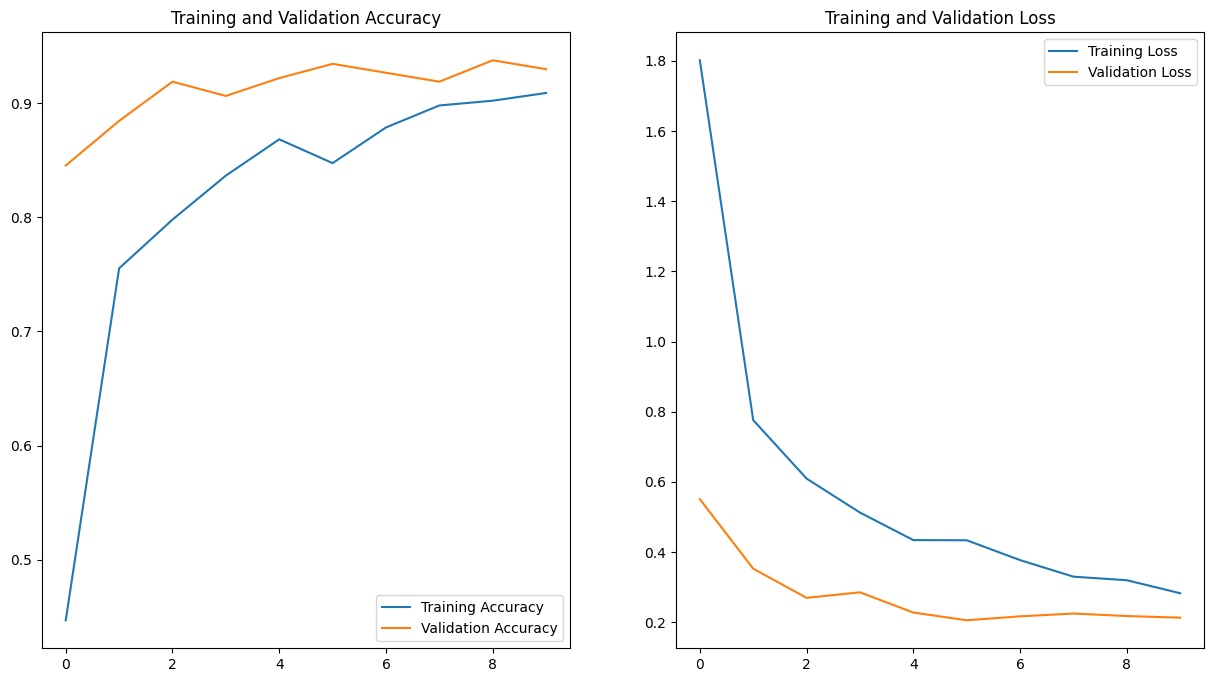

In [ ]:
epochs_range = range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label='Training Accuracy')
plt.plot(epochs_range,val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label='Training Loss')
plt.plot(epochs_range,val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.9161 - loss: 0.2626


[0.29053932428359985, 0.909375011920929]

In [ ]:
y_pred = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step


In [ ]:
y_pred

array([[7.7221859e-03, 6.9269369e-04, 1.5639209e-03, ..., 4.5771771e-03,
        3.0279270e-01, 8.0467941e-04],
       [7.3990040e-02, 8.0047572e-01, 1.6021732e-03, ..., 2.9484541e-04,
        4.8500698e-04, 1.6896318e-04],
       [1.0532640e-05, 9.3216309e-05, 1.0905665e-05, ..., 3.8567863e-02,
        1.0284992e-05, 8.1273633e-05],
       ...,
       [1.7801702e-06, 5.5225684e-07, 3.4823130e-05, ..., 1.0623895e-03,
        4.7035351e-06, 9.9865669e-01],
       [3.8324672e-04, 2.5090395e-04, 1.9866191e-05, ..., 6.2094907e-05,
        2.4787712e-05, 1.0309414e-03],
       [1.6162585e-04, 5.1075240e-05, 1.9205408e-04, ..., 1.4246220e-04,
        1.2437024e-04, 4.8725348e-04]], dtype=float32)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       1.00      0.66      0.79        38
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        38
           5       0.79      1.00      0.88        37
           6       0.66      0.91      0.76        32
           7       0.95      0.88      0.91        40
           8       0.90      0.91      0.91        47
           9       0.88      0.80      0.83        44
          10       0.89      0.87      0.88        47
          11       1.00      0.90      0.95        42
          12       0.94      0.91      0.93        35
          13       0.90      0.85      0.88        41
          14       0.93      0.98      0.95        53
          15       0.94      1.00      0.97        34

    accuracy                           0.91       640
   macro avg       0.92   

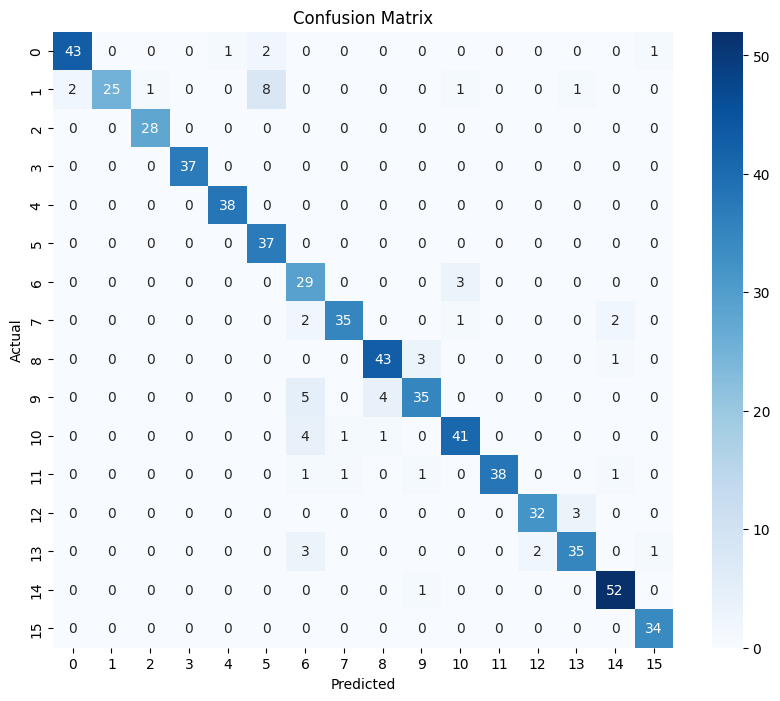

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Convert one-hot to labels
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Report
print(classification_report(y_test_labels, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()